In [1]:
# Observed Trends:

# 1. There are almost equal number of cities above or below equator that has high temperatures. 
# 2. Humidity level is high in most of the cities with high latitude.
# 3. Cities above the equator line have more clouds.
# 4. More cities above equator experience windy conditions.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import seaborn as sns

In [3]:
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

## Perform API Calls

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c2c4f467e45bc773f6cead51e317a85b&q=badulla"

In [6]:
# Starting URL for Weather Map API Call

# set up lists to hold reponse info
city_id = []
city_name = []
cloudiness = []
country = []
dt = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city.replace(' ', '%20' )
    response = requests.get(url).json()
    if 'id' in response:
        city_id.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

In [7]:

data_list = list(zip(city_name, cloudiness, country, dt, humidity, lat, lon, max_temp, wind_speed))
weather_data = pd.DataFrame(data_list, columns=["City Name",
                                      "Cloudiness",
                                      "Country",
                                      "Date",
                                      "Humidity",
                                      "Lat",
                                      "Lng",
                                      "Max Temp",
                                      "Wind Speed"])

weather_data.count()

City Name     565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [8]:
# Display the DataFrame
weather_data.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,76,ZA,1532473200,87,-34.53,20.04,57.20,3.36
1,Albany,75,US,1532472840,51,42.65,-73.75,84.20,14.99
2,Rikitea,88,PF,1532474710,97,-23.12,-134.97,75.58,14.23
3,Busselton,68,AU,1532474710,98,-33.64,115.35,63.61,30.44
4,Ust-Barguzin,12,RU,1532474710,64,53.41,109.03,71.44,4.83


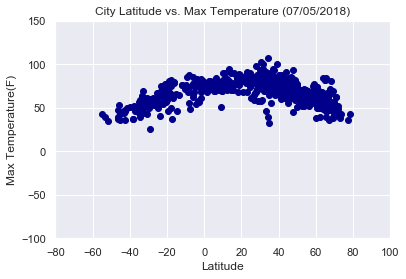

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor="darkblue", marker="o")

plt.ylim(-100,150)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (07/05/2018)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_max_temp.png")

# Show plot
plt.show()

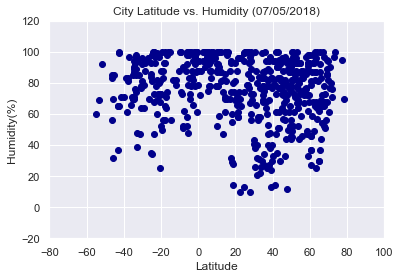

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor="darkblue", marker="o")

plt.ylim(-20,120)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (07/05/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_humidity.png")

# Show plot
plt.show()

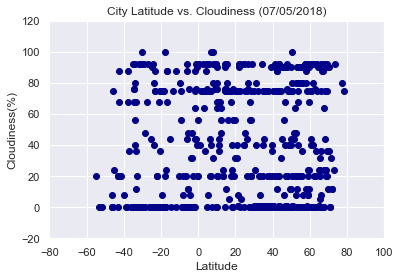

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor="darkblue", marker="o")

plt.ylim(-20,120)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (07/05/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_Cloudiness.png")

# Show plot
plt.show()

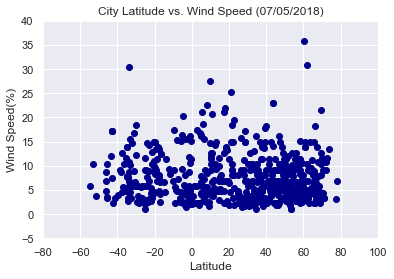

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor="darkblue", marker="o")

plt.ylim(-5,40)
plt.xlim(-80,100)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (07/05/2018)")
plt.ylabel("Wind Speed(%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, 
        color_codes=False, rc=None)

# Save the figure
plt.savefig("latitude_vs_Wind_Speed.png")

# Show plot
plt.show()